# Figure 3
data is stored in ../../data

# setup and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from dms_3d_features.plotting import *

## load data

In [2]:
DATA_PATH = "../../data/"

In [3]:
df_constructs = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_1.json")
df_constructs_nomod = pd.read_json(
    f"{DATA_PATH}/raw-jsons/constructs/pdb_library_nomod.json"
)
df = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df["ln_r_data"] = np.log(df["r_data"])
df["ln_r_data"].replace(-np.inf, -9.8, inplace=True)

df = df.query("r_data_outlier == False").copy()
df_wc = df.query("r_type == 'Flank-WC'").copy()

df_wc.sort_values("ln_r_data", inplace=True, ascending=False)

df_wc_high = df_wc.query("ln_r_data > -5.45").copy()
df_wc_high.sort_values("ln_r_data", inplace=True, ascending=False)

df_bp_details = pd.read_csv(f"{DATA_PATH}/csvs/wc_details.csv")
df_bp_details = df_bp_details.query("flanking_pairs == 'YES'")
df_bp_details["ln_r_data"] = np.log(df_bp_details["r_data"])

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Plotting 

## Figure 3a: As are more reactive in flanking pairs

<Axes: xlabel='ln(Mutation Fraction)', ylabel='Nucleotide'>

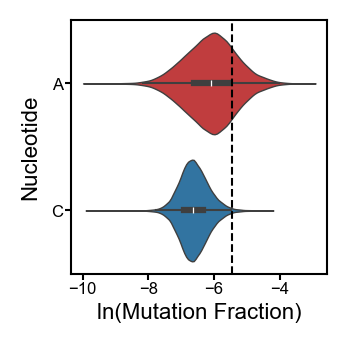

In [4]:
def figure_3a(df_wc, ax):
    """Create violin plot comparing A and C nucleotide mutation rates."""
    ax = sns.violinplot(
        data=df_wc,
        x="ln_r_data",
        y="r_nuc",
        hue="r_nuc",
        density_norm="width",
        palette=["tab:red", "tab:blue"],
        legend=False,
        linewidth=0.5,
        ax=ax,
    )
    ax.axvline(-5.45, color="black", linestyle="--", lw=0.75)
    ax.set_ylabel("Nucleotide")
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_xticks([-10, -8, -6, -4])
    publication_style_ax(ax)
    # for label in ax.get_yticklabels():
    #    label.set_fontsize(8)
    return ax


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
figure_3a(df_wc, ax)

<Axes: xlabel='Nucleotide', ylabel='Mutation Fraction'>

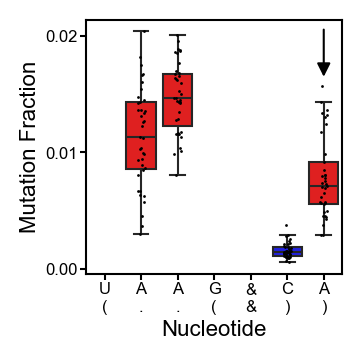

In [5]:
def figure_3b(df, ax):
    """Create boxplot with strip plot for UAAG&CA motif and draw an arrow above the last box."""
    df_motif = df.query("m_sequence == 'UAAG&CA'")
    # TODO not sure why these points are here check!
    df_motif = df_motif.query("not (r_data > 0.018 and r_loc_pos == 6)")
    plot_motif_boxplot_stripplot(df_motif, ax=ax, show_structure=True)
    publication_style_ax(ax)
    # Draw an arrow above the last box (A)
    # Get the x position of the last box (should be 6 if there are 7 boxes: U, A, A, G, &, C, A)
    x_arrow = 6
    y_arrow_start = 0.021  # slightly above the highest y value in the plot
    y_arrow_end = 0.016  # points to the top of the last box
    ax.annotate(
        "",
        xy=(x_arrow, y_arrow_end),
        xytext=(x_arrow, y_arrow_start),
        arrowprops=dict(facecolor="black", arrowstyle="-|>", lw=0.75),
        annotation_clip=False,
    )
    return ax


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
figure_3b(df, ax)

<Axes: xlabel='ln(Mutation Fraction)', ylabel='Diff. in num nucleotides'>

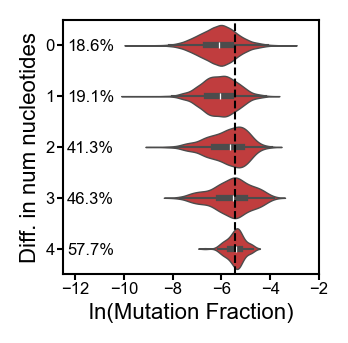

In [6]:
def figure_3d(df_wc, ax):
    """Create violin plot of ln_r_data by side_diff for A nucleotides."""
    df_pos = df_wc.query("r_nuc == 'A'").copy()
    df_pos["side_diff"] = [
        abs(int(x.split("x")[0]) - int(x.split("x")[1])) for x in df_pos["m_token"]
    ]
    df_pos["side_diff"] = df_pos["side_diff"].astype(str)
    df_pos.sort_values("side_diff", inplace=True, ascending=True)
    plot_violins_w_percent(df_pos, "ln_r_data", "side_diff", color="tab:red", ax=ax)
    ax.set_xlim(-12.5, -3)
    ax.set_xticks([-12, -10, -8, -6, -4, -2])
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_ylabel("Diff. in num nucleotides", labelpad=2)
    publication_style_ax(ax)
    return ax


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
figure_3d(df_wc, ax)

<Axes: xlabel='ln(Mutation Fraction)', ylabel="5' Nucleotide">

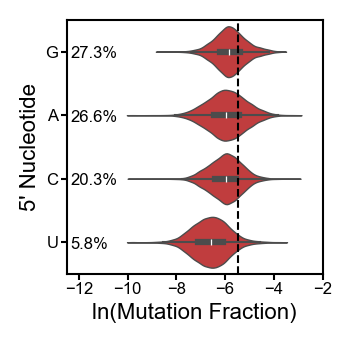

In [7]:
def figure_3e(df_wc, ax):
    """Create violin plot of ln_r_data by p5_res for A nucleotides."""
    df_pos = df_wc.query("r_nuc == 'A'").copy()
    plot_violins_w_percent(
        df_pos, "ln_r_data", "p5_res", color="tab:red", sorted_by_mean=True, ax=ax
    )
    ax.set_xlim(-12.5, -3)
    ax.set_xticks([-12, -10, -8, -6, -4, -2])
    ax.set_ylabel("5' Nucleotide", labelpad=2)
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    publication_style_ax(ax)
    return ax


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
figure_3e(df_wc, ax)

<Axes: xlabel='ln(Mutation Fraction)', ylabel="3' Nucleotide">

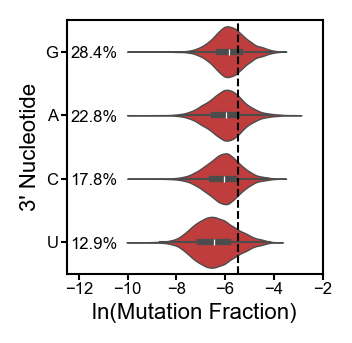

In [8]:
def figure_3f(df_wc, ax):
    """Create violin plot of ln_r_data by p3_res for A nucleotides and save as PNG."""
    df_pos = df_wc.query("r_nuc == 'A'").copy()
    plot_violins_w_percent(
        df_pos, "ln_r_data", "p3_res", color="tab:red", sorted_by_mean=True, ax=ax
    )
    ax.set_ylabel("3' Nucleotide", labelpad=2)
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_xlim(-12.5, -3)
    ax.set_xticks([-12, -10, -8, -6, -4, -2])
    publication_style_ax(ax)
    return ax


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
figure_3f(df_wc, ax)

<Axes: xlabel='ln(Mutation Fraction)', ylabel='Nucleotide Stack'>

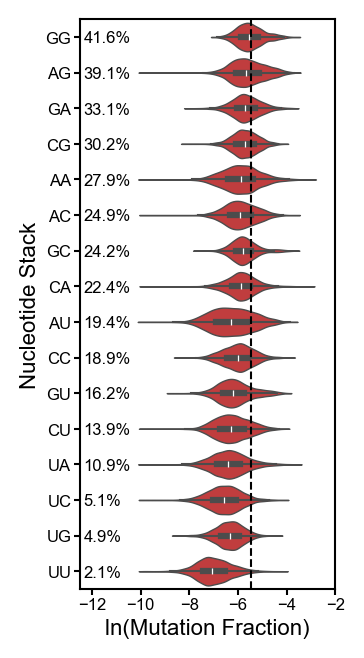

In [9]:
def figure_3g(df_wc, ax):
    """Create violin plot of ln_r_data by r_stack for A nucleotides."""
    df_pos = df_wc.query("r_nuc == 'A'").copy()
    plot_violins_w_percent(
        df_pos, "ln_r_data", "r_stack", color="tab:red", sorted_by_mean=True, ax=ax
    )
    ax.set_ylabel("Nucleotide Stack", labelpad=2)
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_xlim(-12.5, -3)
    ax.set_xticks([-12, -10, -8, -6, -4, -2])
    publication_style_ax(ax)
    return ax


fig, ax = plt.subplots(figsize=(1.65, 3.7), dpi=200)
figure_3g(df_wc, ax)

In [10]:
def adjust_subplot_size(coords, ratio):
    """
    Adjusts the size of a subplot by a given ratio, keeping its center fixed.

    Args:
        coords (tuple): (left, bottom, width, height) of the subplot.
        ratio (float): The factor by which to scale width and height.

    Returns:
        tuple: (new_left, new_bottom, new_width, new_height)
    """
    left, bottom, width, height = coords
    new_width = width * ratio
    new_height = height * ratio
    # Adjust left and bottom to keep center fixed
    center_x = left + width / 2
    center_y = bottom + height / 2
    new_left = center_x - new_width / 2
    new_bottom = center_y - new_height / 2
    return (new_left, new_bottom, new_width, new_height)

In [11]:
def shift_subplot_center(coords, dx=0.0, dy=0.0):
    """
    Shifts the center of a subplot by dx (width fraction) and dy (height fraction).

    Args:
        coords (tuple): (left, bottom, width, height) of the subplot.
        dx (float): Amount to shift the center in the x (width) direction.
        dy (float): Amount to shift the center in the y (height) direction.

    Returns:
        tuple: (new_left, new_bottom, width, height)
    """
    left, bottom, width, height = coords
    new_left = left + dx
    new_bottom = bottom + dy
    return (new_left, new_bottom, width, height)

## Final figure

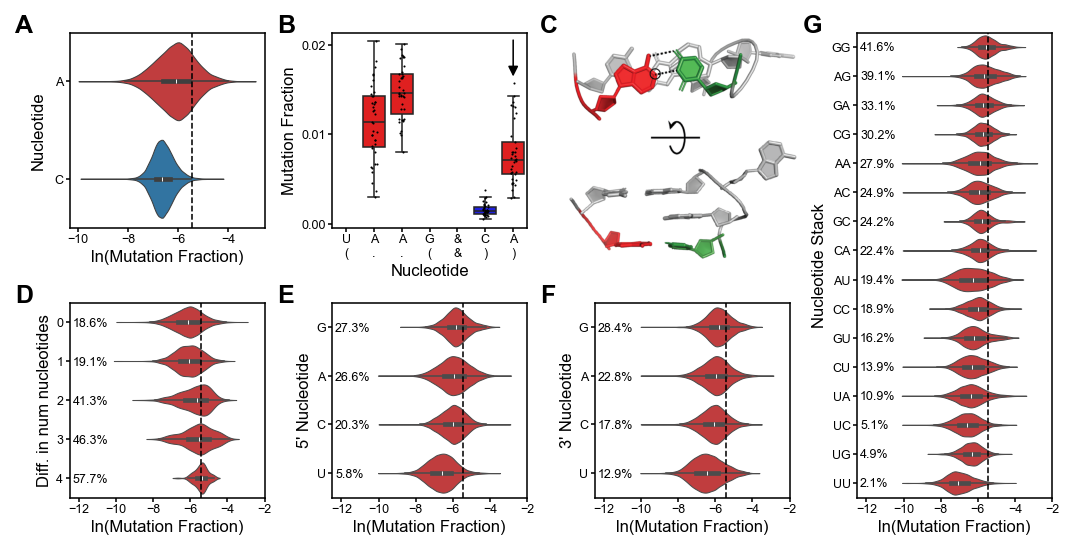

In [13]:
fig_size = (7, 6)
layout = (2, 4)
subplot_size = (1.3, 1.3)  # Each subplot is 4" x 3"
spacing = {
    "hspace": 0.45,  # horizontal spacing in inches
    "wspace": 0.50,  # vertical spacing in inches
    "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.70},
}

coords_list = calculate_subplot_coordinates(fig_size, layout, subplot_size, spacing)
coords_list = merge_neighboring_coords(coords_list, [3, 7])
# Move the fourth coordinate (index 3) to the end of the list
coords_list.append(coords_list.pop(3))

fig = plt.figure(figsize=fig_size, dpi=150)
fig.patches = []


ax1 = fig.add_axes(coords_list[0])
figure_3a(df_wc, ax1)

ax2 = fig.add_axes(coords_list[1])
figure_3b(df, ax2)


adjusted_coords = adjust_subplot_size(coords_list[2], 1.20)
adjusted_coords = shift_subplot_center(adjusted_coords, dx=-0.01, dy=-0.025)
ax3 = fig.add_axes(adjusted_coords)
load_and_fit_image_to_subplot("../../figures/figure_3c.png", ax3)
# draw_box_around_subplot(
#    fig, coords_list[2], linewidth=2, edgecolor="red", facecolor="none"
# )


ax4 = fig.add_axes(coords_list[3])
figure_3d(df_wc, ax4)

ax5 = fig.add_axes(coords_list[4])
figure_3e(df_wc, ax5)

ax6 = fig.add_axes(coords_list[5])
figure_3f(df_wc, ax6)

ax7 = fig.add_axes(coords_list[6])
figure_3g(df_wc, ax7)

add_subplot_labels(fig, coords_list, left_offset=0.052)
fig.savefig("../../figures/figure_3.png", dpi=600, bbox_inches="tight")